In [1]:
#imports
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\HACK\Anaconda2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Preparing the data

In [2]:
#variables to contain paths to data sets
train_path = 'dog_cat/train'
valid_path = 'dog_cat/valid'
test_path = 'dog_cat/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 8)

Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [4]:
#plot images with labels in jupyter notebook
def plot(ims, figsize = (12,6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

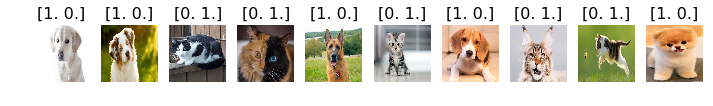

In [6]:
plot(imgs, titles = labels)